<a href="https://colab.research.google.com/github/wjdtjdus/2025-1-myclass-BDA/blob/main/inclass/09w_B_wed_0430_easy_ch07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'sex'   : ['M', 'F', np.nan, 'M', 'F'],
                   'score' : [5, 4, 3, 4, None]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [3]:
df['score'] + 1

,score
0,6.0
1,5.0
2,4.0
3,5.0
4,NaN


In [4]:
pd.isna(df)

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [5]:
pd.isnull(df)

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [6]:
pd.isna(df).sum()

,0
sex,1
score,1


In [7]:
pd.isna(df).sum(axis=1)

,0
0,0
1,0
2,1
3,0
4,1


In [8]:
s = pd.Series([True, False, True])
s

,0
0,True
1,False
2,True


In [9]:
s.sum()

np.int64(2)

In [10]:
s.any()

np.True_

In [11]:
df.isnull().any()

,0
sex,True
score,True


In [12]:
df.isna().any()

,0
sex,True
score,True


In [13]:
df.notnull()

,sex,score
0,True,True
1,True,True
2,False,True
3,True,True
4,True,False


In [14]:
df.notnull().all()

,0
sex,False
score,False


In [15]:
df.notna().any()

,0
sex,True
score,True


In [16]:
df.notna().all()

,0
sex,False
score,False


In [17]:
df.isna().all()

,0
sex,False
score,False


In [18]:
df.isna().any(axis=1)

,0
0,False
1,False
2,True
3,False
4,True


In [19]:
~df.isna().any(axis=1)

,0
0,True
1,True
2,False
3,True
4,False


In [20]:
df[df.isna().any(axis=1)]

,sex,score
2,NaN,3.0
4,F,NaN


In [21]:
df[~df.isna().any(axis=1)]

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [22]:
df[ [True]*5 ]

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


## 결측치 제거

In [23]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [24]:
df.dropna(subset = ['score'])

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [25]:
df_nomiss = df.dropna(subset = ['score'])
df_nomiss['score'] + 1

,score
0,6.0
1,5.0
2,4.0
3,5.0


In [26]:
df.dropna(subset = [2], axis = 1)

,score
0,5.0
1,4.0
2,3.0
3,4.0
4,NaN


In [27]:
df.dropna(subset = [3], axis = 1)

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [28]:
df.dropna()

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [29]:
df_nomiss = df.dropna(subset = ['score', 'sex'])
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [30]:
df_nomiss2 = df.dropna()
df_nomiss2

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [31]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [32]:
df['score'].mean()

np.float64(4.0)

In [33]:
df['score'].sum()

np.float64(16.0)

In [34]:
df.groupby('sex').agg(mean_score = ('score', 'mean'),
                      sum_score  = ('score', 'sum'))

,mean_score,sum_score
sex,,
F,4.0,4.0
M,4.5,9.0


## dropna

In [37]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman', np.nan],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip', np.nan],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"), pd.NaT, pd.NaT]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT
3,NaN,NaN,NaT


In [38]:
df.isna()

,name,toy,born
0,False,True,True
1,False,False,False
2,False,False,True
3,True,True,True


In [39]:
df.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [40]:
df.dropna(axis='columns')

""
0
1
2
3


In [41]:
df.dropna(how='all')

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [42]:
df.dropna(how='any')

,name,toy,born
1,Batman,Batmobile,1940-04-25


## thresh

In [43]:
df.dropna(thresh=2)

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [44]:
df.dropna(thresh=1)

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [45]:
df.dropna(thresh=3)

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [46]:
df.dropna(thresh=1, how='any') # 오류

TypeError: You cannot set both the how and thresh arguments at the same time.

In [47]:
df.dropna(subset=['name', 'toy'])

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [48]:
df.dropna(subset=['toy'])

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [49]:
df.dropna(subset='toy')

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


## de.empty

In [50]:
df1 = pd.DataFrame(index = ['row1', 'row2', 'row3'])
df1

""
row1
row2
row3


In [51]:
df1.empty

True

In [52]:
df1 = pd.DataFrame(columns=['col1','col2','col3'])
df1

,col1,col2,col3


In [53]:
df1.empty

True

In [54]:
df1 = pd.DataFrame(index = ['row1', 'row2', 'row3'],
                   columns=['col1', 'col2', 'col3'])
df1

,col1,col2,col3
row1,NaN,NaN,NaN
row2,NaN,NaN,NaN
row3,NaN,NaN,NaN


In [55]:
df1.empty

False

In [56]:
df1 = pd.DataFrame(np.nan,
                  index = ['row1', 'row2', 'row3'],
                  columns=['col1','col2','col3'])
df1

,col1,col2,col3
row1,NaN,NaN,NaN
row2,NaN,NaN,NaN
row3,NaN,NaN,NaN


In [58]:
df1.empty

False

In [59]:
df1 = pd.DataFrame(2,
                  index = ['row1', 'row2', 'row3'],
                  columns=['col1','col2','col3'])
df1

,col1,col2,col3
row1,2,2,2
row2,2,2,2
row3,2,2,2


## 결측치 대체

In [60]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 2.14 MiB | 5.39 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [61]:
exam = pd.read_csv('data/exam.csv')
exam.loc[[2, 7, 14], ['math']] = np.nan
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [62]:
exam.loc[[2, 7, 14], ['math']]

,math
2,NaN
7,NaN
14,NaN


In [63]:
exam.loc[[2, 7, 14], 'math']

,math
2,NaN
7,NaN
14,NaN


In [64]:
round(exam['math'].mean(), 2)

np.float64(55.24)

In [65]:
import numpy as np
np.set_printoptions(precision=1)
np.array([np.pi])

array([3.1])

## 인자suppress

In [66]:
np.set_printoptions(precision=1, suppress = False)
np.array([0.0000001])

array([1.e-07])

In [67]:
np.set_printoptions(precision=1, suppress = True)
np.array([0.0000001])

array([0.])

In [68]:
round(np.pi, 2)

3.14

## fillna()

In [69]:
exam['math'] = exam['math'].fillna(100)
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,100.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,100.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [70]:
exam = pd.read_csv('data/exam.csv')
exam.loc[[2, 7, 14], ['math']] = np.nan
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [71]:
pd.set_option('display.precision', 2)
exam['math'] = exam['math'].fillna(exam['math'].mean())
exam

,id,nclass,math,english,science
0,1,1,50.00,98,50
1,2,1,60.00,97,60
2,3,1,55.24,86,78
3,4,1,30.00,98,58
4,5,2,25.00,80,65
5,6,2,50.00,89,98
6,7,2,80.00,90,45
7,8,2,55.24,78,25
8,9,3,20.00,98,15
9,10,3,50.00,98,45


In [72]:
exam['math'].isna().sum()

np.int64(0)

## 이상치 정제

In [73]:
df = pd.DataFrame({'sex'   : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [74]:
df['sex'].value_counts()

,count
sex,
1,3
2,2
3,1


In [75]:
df['sex'].value_counts().sort_index()

,count
sex,
1,3
2,2
3,1


In [76]:
df['score'].value_counts()

,count
score,
4,2
5,1
3,1
2,1
6,1


In [77]:
df['score'].value_counts().sort_index()

,count
score,
2,1
3,1
4,2
5,1
6,1


## 결측처리

In [78]:
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [79]:
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [80]:
df.dropna(subset = ['sex', 'score']).groupby('sex').agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [81]:
df = pd.DataFrame([1])
df

,0
0,1


In [82]:
df = pd.DataFrame([1, 1, 2, 2])
df

,0
0,1
1,1
2,2
3,2


In [83]:
df = pd.DataFrame([[1, 1, 2, 2]])
df

,0,1,2,3
0,1,1,2,2


In [84]:
df = pd.DataFrame({'x1' : [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 10, np.nan)  # 조건에 맞으면 문자 부여
df

,x1,x2
0,1,10.0
1,1,10.0
2,2,NaN
3,2,NaN


In [85]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [86]:
df = pd.DataFrame({'x1' : [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 'a', np.nan)  # 조건에 맞으면 문자열 부여
df

DTypePromotionError: The DType <class 'numpy.dtypes.StrDType'> could not be promoted by <class 'numpy.dtypes._PyFloatDType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes._PyFloatDType'>)

In [87]:
df.isna()

,x1
0,False
1,False
2,False
3,False


In [88]:
df['x2'] = np.where(df['x1'] == 1, 'a', 'etc')
df

,x1,x2
0,1,a
1,1,a
2,2,etc
3,2,etc


In [89]:
df['x2'] = df['x2'].replace('etc', np.nan)
df

,x1,x2
0,1,a
1,1,a
2,2,NaN
3,2,NaN


In [90]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [91]:
df2 = df.fillna(10)
df2

,x1,x2
0,1,a
1,1,a
2,2,10
3,2,10


In [92]:
df

,x1,x2
0,1,a
1,1,a
2,2,NaN
3,2,NaN


In [93]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      4 non-null      int64 
 1   x2      4 non-null      object
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


In [94]:
type(df2.loc[2, 'x2'])

int

##이상치 제거- 극단적인 값

In [95]:
!git clone https://github.com/ai7dnn/data

fatal: destination path 'data' already exists and is not an empty directory.


In [96]:
import pandas as pd
mpg = pd.read_csv('data/mpg.csv')
mpg.sample(10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
59,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv
177,toyota,4runner 4wd,4.0,2008,6,auto(l5),4,16,20,r,suv
208,volkswagen,gti,2.0,1999,4,auto(l4),f,19,26,r,compact
34,chevrolet,malibu,3.1,1999,6,auto(l4),f,18,26,r,midsize
43,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,11,17,e,minivan
104,honda,civic,1.8,2008,4,manual(m5),f,26,34,r,subcompact
73,dodge,ram 1500 pickup 4wd,5.9,1999,8,auto(l4),4,11,15,r,pickup
70,dodge,ram 1500 pickup 4wd,5.2,1999,8,auto(l4),4,11,15,r,pickup
192,toyota,camry solara,3.3,2008,6,auto(s5),f,18,27,r,compact
186,toyota,camry solara,2.2,1999,4,auto(l4),f,21,27,r,compact


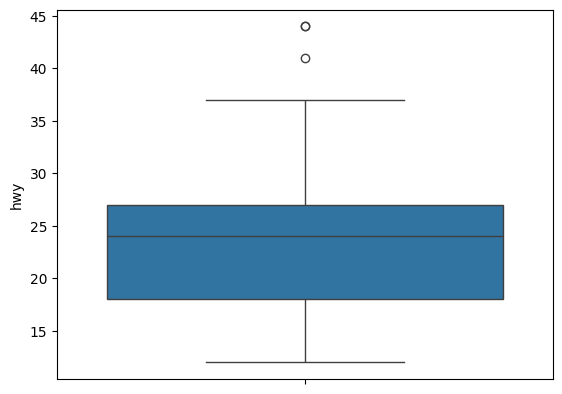

In [97]:
import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy');

In [98]:
s = pd.Series([1, 2, 3, 4, 5])

In [99]:
s.quantile([.01, .25, .50, .75, 1])

,0
0.01,1.04
0.25,2.00
0.50,3.00
0.75,4.00
1.00,5.00


In [100]:
s.quantile(.50)

np.float64(3.0)

In [101]:
s.quantile([.25, .5, .75, 1])

,0
0.25,2.0
0.50,3.0
0.75,4.0
1.00,5.0


In [102]:
s2 = pd.Series([1, 2, 4, 5])

In [103]:
s2.quantile([.25, .5, .75, 1])

,0
0.25,1.75
0.50,3.00
0.75,4.25
1.00,5.00


In [104]:
pct25, pct50, pct75 = mpg['hwy'].quantile([.25, .5, .75])
pct25

18.0

In [105]:
pct50, pct75

(24.0, 27.0)

In [106]:
iqr = pct75 - pct25
iqr

9.0

In [107]:
pct25 - 1.5 * iqr  # 하한

4.5

In [108]:
pct75 + 1.5 * iqr  # 상한

40.5

In [109]:
mpg['hwy'].describe()

,hwy
count,234.00
mean,23.44
std,5.95
min,12.00
25%,18.00
50%,24.00
75%,27.00
max,44.00


In [110]:
mpg['hwy'].describe()['25%']

np.float64(18.0)

##결측값확인

In [111]:
mpg.isna().sum()

,0
manufacturer,0
model,0
displ,0
year,0
cyl,0
trans,0
drv,0
cty,0
hwy,0
fl,0


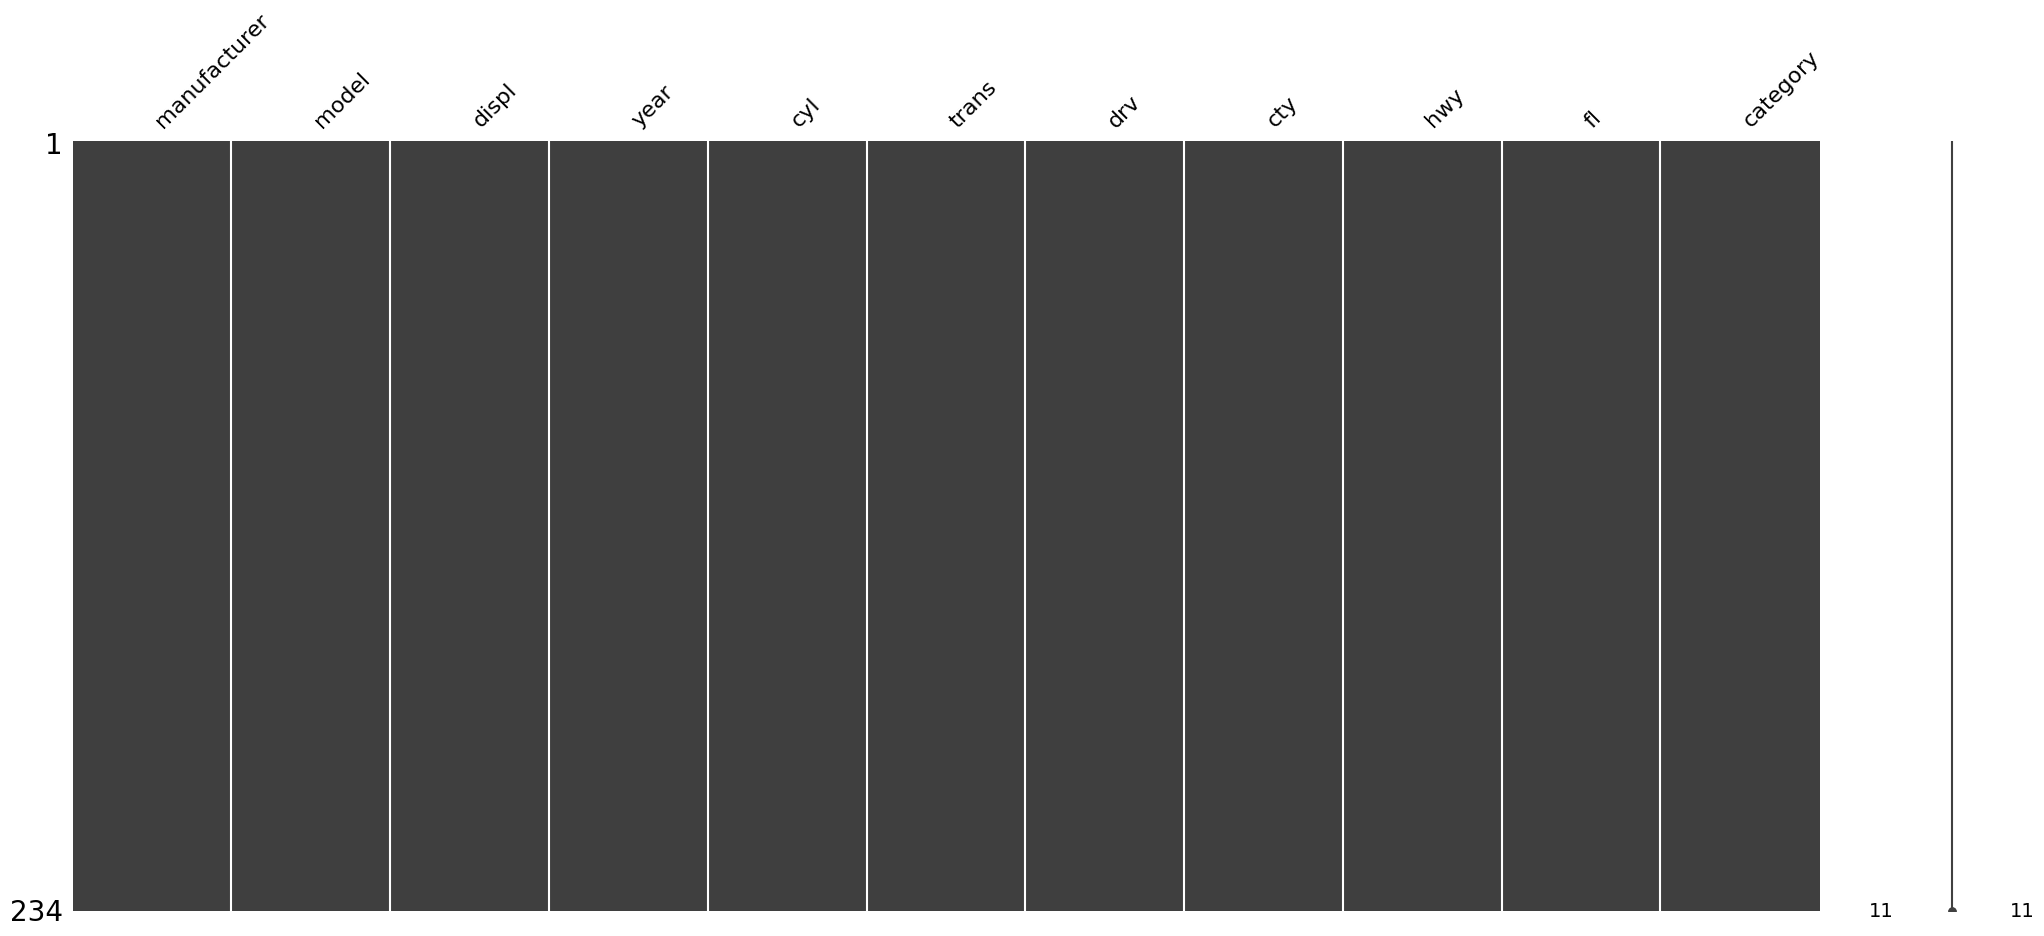

In [112]:
import missingno as msno
msno.matrix(mpg);

In [113]:
# 4.5 ~ 40.5 벗어나면 NaN 부여
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])

# 결측치 빈도 확인
mpg['hwy'].isna().sum()

np.int64(3)

In [114]:
dmpg = mpg.dropna(subset = ['hwy'])
len(dmpg)

231

In [115]:
dmpg.dropna(subset = ['hwy']).groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,27.73
r,21.00


In [116]:
dmpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,27.73
r,21.00


In [117]:
len(mpg)

234

In [118]:
mpg = pd.read_csv('data/mpg.csv')
mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,28.16
r,21.00


In [119]:
mpg[ mpg['hwy'] > 40.5 ]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


In [120]:
mpg.query( 'hwy > 40.5' )

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


In [121]:
## 1. 결측치 정제하기
df = pd.DataFrame({'sex'   : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
pd.isna(df).sum()                                 # 결측치 확인
df_nomiss = df.dropna(subset = ['score'])         # 결측치 제거
df_nomiss = df.dropna(subset = ['score', 'sex'])  # 여러 변수 동시에 결측치 제거


## 2. 이상치 정제하기

# 이상치 확인
df['sex'].value_counts(sort = False)

# 이상치 결측 처리
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])

# 상자 그림으로 극단치 기준값 찾기
pct25 = mpg['hwy'].quantile(.25)  # 1사분위수
pct75 = mpg['hwy'].quantile(.75)  # 3사분위수
iqr = pct75 - pct25               # IQR
pct25 - 1.5 * iqr                 # 하한
pct75 + 1.5 * iqr                 # 상한

# 극단치 결측 처리
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])

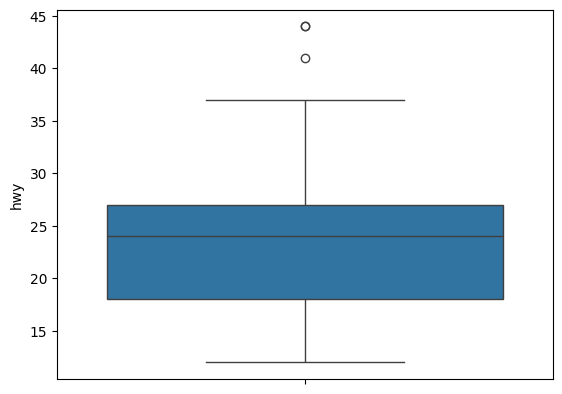

In [122]:
mpg = pd.read_csv('data/mpg.csv')

import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy');

In [123]:
def outlier_iqr(data, column):
    # lower, upper 글로벌 변수 선언하기
    global lower, upper

    # 4분위수 기준 지정하기
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)

    # IQR 계산하기
    iqr = q75 - q25

    # outlier cutoff 계산하기
    cut_off = iqr * 1.5

    # lower와 upper bound 값 구하기
    lower, upper = q25 - cut_off, q75 + cut_off

    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기
    data1 = data[data[column] > upper][column]
    data2 = data[data[column] < lower][column]
    print(data1)
    print(data2)
    print('\nIQR:',iqr, 'lower bound:', lower, 'upper bound:', upper)

    # 이상치 총 개수 구하기
    return print('총 이상치 개수는', data1.shape[0] + data2.shape[0], '이다.')

In [124]:
outlier_iqr(mpg, "hwy")

212    44
221    44
222    41
Name: hwy, dtype: int64
Series([], Name: hwy, dtype: int64)

IQR: 9.0 lower bound: 4.5 upper bound: 40.5
총 이상치 개수는 3 이다.


In [125]:
#사분위수 구하기
q1 = mpg['hwy'].quantile(0.25)
q2 = mpg['hwy'].quantile(0.5)
q3 = mpg['hwy'].quantile(0.75)
q4 = mpg['hwy'].quantile(1)

# IQR값 구하기
iqr = q3-q1

#이상치값 구하기
mpg[(mpg['hwy'] < q1-1.5 * iqr) | (mpg['hwy'] > q3+1.5 * iqr)]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact
